# Logistic Regression for Mobility Prediction

In [1]:
import pandas as pd
import numpy as np
from sklearn import preprocessing
import matplotlib.pyplot as plt 
plt.rc("font", size=14)
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
import seaborn as sns
sns.set(style="white")
sns.set(style="whitegrid", color_codes=True)
from verstack.stratified_continuous_split import scsplit
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

D:\Programs\Miniconda\lib\site-packages\xgboost\compat.py:36: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index


In [2]:
data = pd.read_csv('Data/Preprocessed_Data_with_Label.csv', encoding='latin1')
print(data.shape)

(4701, 1660)


## Correlation study

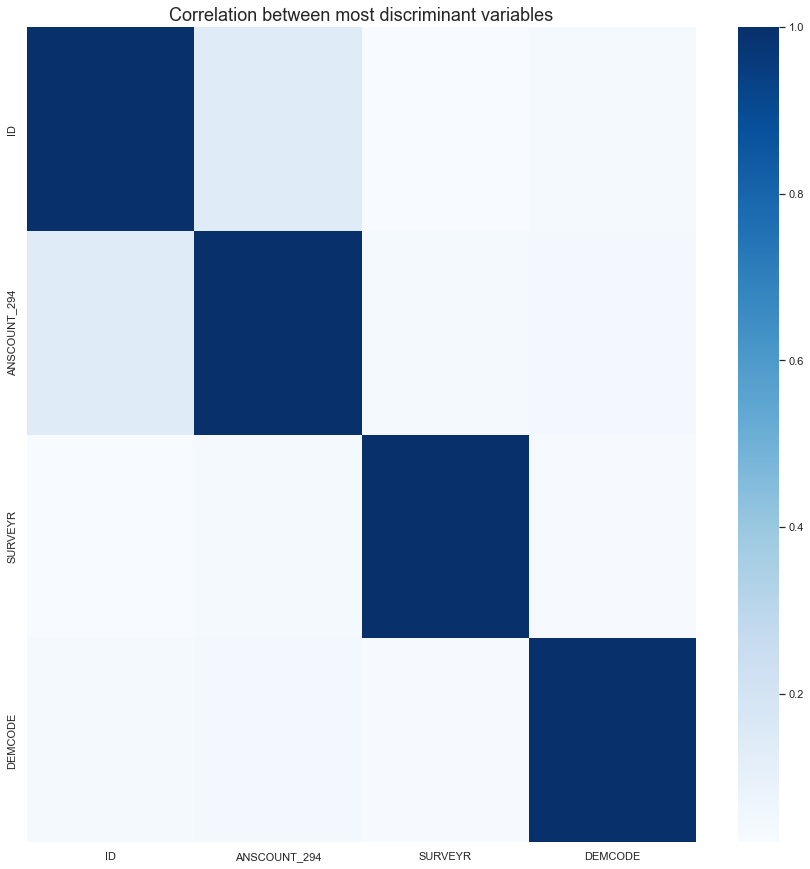

In [105]:
# corr = data.iloc[:, :60].corr()
# corr = X_train[X_train.columns[Features_per_Model[-1]]].corr()
corr = data[['ID', 'ANSCOUNT_294', 'SURVEYR', 'DEMCODE']].corr()
corr = np.abs(corr)
fig, ax = plt.subplots(figsize=(15, 15))
ax = sns.heatmap(corr, annot=False, ax=ax, cmap="Blues");
ax.set_title("Correlation between most discriminant variables", size=18)
plt.savefig("Results/Correlation between most discriminant variables")

## Remove the labels from training data

In [4]:
labels           = data.columns[616:635]
label_to_predict = labels[0]# Predicting the percentage of people that wants to leave their job

### Select k features

In [5]:
def RMSE(y_test, y_pred):
    return np.sqrt(np.mean((y_pred-y_test)**2))

In [17]:
## K-cross validation
K = 20

num_features       = [50, 40, 30, 20, 10, 9, 8, 7, 6, 5, 4, 3, 2, 1]
RMSE_per_Split     = []
Features_per_Split = []

for k in range(K):

    ## Splits the dataset into 0.8/0.2
    X_train, X_test, y_train, y_test = scsplit(data.drop(columns=labels), data[label_to_predict],
                                               stratify=data[label_to_predict],
                                               train_size=0.8, test_size=0.2,
                                                continuous = False) # tested
    X_train_subset = X_train.copy(deep=True)
    X_test_subset  = X_test.copy(deep=True)

    RMSE_per_Model     = []
    Features_per_Model = []

    print("\nBeginning split number {0}\n\n".format(k+1))

    for n in num_features:
        print("Searching for {0} discriminant features\n".format(n))
        logreg = LogisticRegression()

        rfe    = RFE(logreg, n_features_to_select=n, step=100, verbose=1)
        rfe    = rfe.fit(X_train_subset, y_train)
        y_pred = rfe.predict(X_test_subset)

        ## Stores the RMSE on test dataset per model
        RMSE_i = RMSE(y_test, y_pred)
        RMSE_per_Model.append(RMSE_i)
        print("\nRMSE for model with {0} features: {1}".format(n, RMSE_i))

        ## Stores the selected features per model
        Features_per_Model = Features_per_Model + [X_train_subset.columns[rfe.support_]]
        print()
        
        ## To speed things up, we assume that the subset of features that are going to be selected next 
        ## are included in the one we got previously: X_train_subset.columns_{i+1} `included in` X_train_subset.columns_{i}
        X_train_subset = X_train_subset[Features_per_Model[-1]]
        X_test_subset  = X_test_subset[Features_per_Model[-1]]
        
    ## Stores the RMSE and the selected features on test dataset per model per split
    RMSE_per_Split.append(RMSE_per_Model)
    Features_per_Split.append(Features_per_Model)

print("DONE !")


Beginning split number 1


Searching for 50 discriminant features

Fitting estimator with 1641 features.
Fitting estimator with 1541 features.
Fitting estimator with 1441 features.
Fitting estimator with 1341 features.
Fitting estimator with 1241 features.
Fitting estimator with 1141 features.
Fitting estimator with 1041 features.
Fitting estimator with 941 features.
Fitting estimator with 841 features.
Fitting estimator with 741 features.
Fitting estimator with 641 features.
Fitting estimator with 541 features.
Fitting estimator with 441 features.
Fitting estimator with 341 features.
Fitting estimator with 241 features.
Fitting estimator with 141 features.

RMSE for model with 50 features: 9.425810766605915

Searching for 40 discriminant features

Fitting estimator with 50 features.

RMSE for model with 40 features: 9.210318567727303

Searching for 30 discriminant features

Fitting estimator with 40 features.

RMSE for model with 30 features: 9.326182676509273

Searching for 20 discr


RMSE for model with 10 features: 9.658405841578496

Searching for 9 discriminant features

Fitting estimator with 10 features.

RMSE for model with 9 features: 9.657800666239721

Searching for 8 discriminant features

Fitting estimator with 9 features.

RMSE for model with 8 features: 9.657745648419423

Searching for 7 discriminant features

Fitting estimator with 8 features.

RMSE for model with 7 features: 9.657910700940064

Searching for 6 discriminant features

Fitting estimator with 7 features.

RMSE for model with 6 features: 9.6578556837466

Searching for 5 discriminant features

Fitting estimator with 6 features.

RMSE for model with 5 features: 9.658460855638113

Searching for 4 discriminant features

Fitting estimator with 5 features.

RMSE for model with 4 features: 9.658460855638113

Searching for 3 discriminant features

Fitting estimator with 4 features.

RMSE for model with 3 features: 9.483471834968109

Searching for 2 discriminant features

Fitting estimator with 3 fe


RMSE for model with 1 features: 9.657085410127166


Beginning split number 8


Searching for 50 discriminant features

Fitting estimator with 1641 features.
Fitting estimator with 1541 features.
Fitting estimator with 1441 features.
Fitting estimator with 1341 features.
Fitting estimator with 1241 features.
Fitting estimator with 1141 features.
Fitting estimator with 1041 features.
Fitting estimator with 941 features.
Fitting estimator with 841 features.
Fitting estimator with 741 features.
Fitting estimator with 641 features.
Fitting estimator with 541 features.
Fitting estimator with 441 features.
Fitting estimator with 341 features.
Fitting estimator with 241 features.
Fitting estimator with 141 features.

RMSE for model with 50 features: 9.61009255170234

Searching for 40 discriminant features

Fitting estimator with 50 features.

RMSE for model with 40 features: 9.605557636768609

Searching for 30 discriminant features

Fitting estimator with 40 features.

RMSE for model with 30 


RMSE for model with 20 features: 9.6510861771914

Searching for 10 discriminant features

Fitting estimator with 20 features.

RMSE for model with 10 features: 9.656425126692467

Searching for 9 discriminant features

Fitting estimator with 10 features.

RMSE for model with 9 features: 9.663300866392987

Searching for 8 discriminant features

Fitting estimator with 9 features.

RMSE for model with 8 features: 9.660661161128578

Searching for 7 discriminant features

Fitting estimator with 8 features.

RMSE for model with 7 features: 9.658130766579891

Searching for 6 discriminant features

Fitting estimator with 7 features.

RMSE for model with 6 features: 9.660661161128578

Searching for 5 discriminant features

Fitting estimator with 6 features.

RMSE for model with 5 features: 9.660111131740516

Searching for 4 discriminant features

Fitting estimator with 5 features.

RMSE for model with 4 features: 9.660111131740516

Searching for 3 discriminant features

Fitting estimator with 4


RMSE for model with 2 features: 9.656865320665217

Searching for 1 discriminant features

Fitting estimator with 2 features.

RMSE for model with 1 features: 9.657085410127166


Beginning split number 15


Searching for 50 discriminant features

Fitting estimator with 1641 features.
Fitting estimator with 1541 features.
Fitting estimator with 1441 features.
Fitting estimator with 1341 features.
Fitting estimator with 1241 features.
Fitting estimator with 1141 features.
Fitting estimator with 1041 features.
Fitting estimator with 941 features.
Fitting estimator with 841 features.
Fitting estimator with 741 features.
Fitting estimator with 641 features.
Fitting estimator with 541 features.
Fitting estimator with 441 features.
Fitting estimator with 341 features.
Fitting estimator with 241 features.
Fitting estimator with 141 features.

RMSE for model with 50 features: 10.300789771935502

Searching for 40 discriminant features

Fitting estimator with 50 features.

RMSE for model with 40 


RMSE for model with 30 features: 9.764495750331193

Searching for 20 discriminant features

Fitting estimator with 30 features.

RMSE for model with 20 features: 9.534544832592607

Searching for 10 discriminant features

Fitting estimator with 20 features.

RMSE for model with 10 features: 9.659561071032986

Searching for 9 discriminant features

Fitting estimator with 10 features.

RMSE for model with 9 features: 9.659561071032986

Searching for 8 discriminant features

Fitting estimator with 9 features.

RMSE for model with 8 features: 9.659396046712631

Searching for 7 discriminant features

Fitting estimator with 8 features.

RMSE for model with 7 features: 9.659396046712631

Searching for 6 discriminant features

Fitting estimator with 7 features.

RMSE for model with 6 features: 9.65906598961364

Searching for 5 discriminant features

Fitting estimator with 6 features.

RMSE for model with 5 features: 9.658240797519458

Searching for 4 discriminant features

Fitting estimator wi

### Compute mean RMSE over all splits

In [22]:
Mean_RMSE_per_Model = np.mean(RMSE_per_Split, axis=0)

In [102]:
print("Smallest RMSE value achieved by models is:", np.min(RMSE_per_Split))

Smallest RMSE value achieved by models is: 9.076660169355693


In [20]:
optimal_num_f = num_features[np.argmin(Mean_RMSE_per_Model)]
print("The overall optimal number of features is {}".format(optimal_num_f))

The optimal number of features is 3


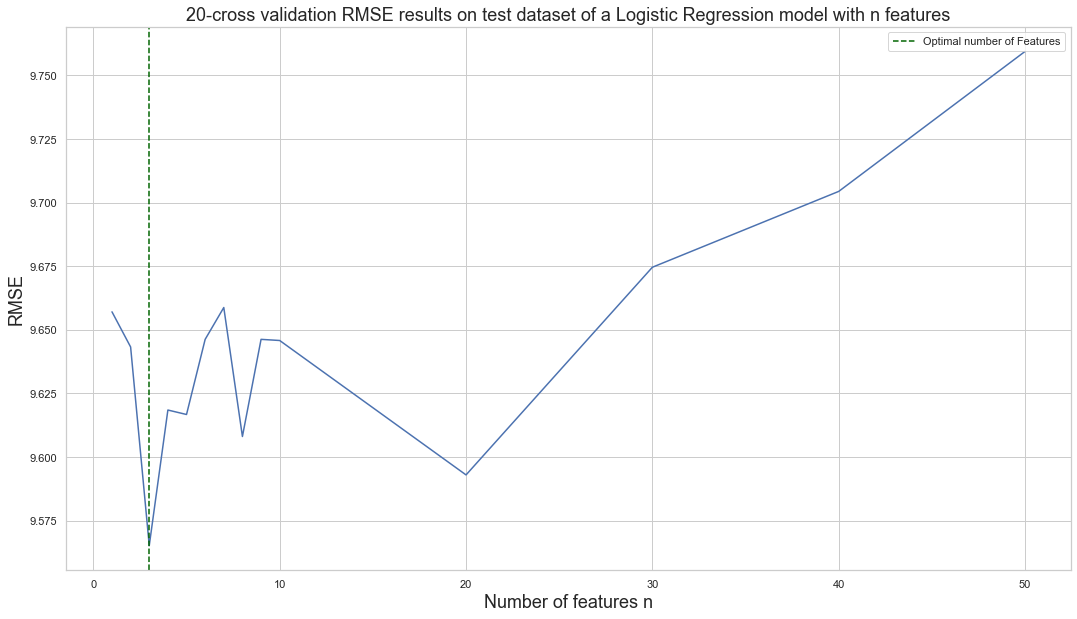

In [141]:
plt.figure(figsize=(18,10))
plt.plot(num_features, Mean_RMSE_per_Model)
plt.title("{0}-cross validation RMSE results on test dataset of a Logistic Regression model with n features".format(K), size=18)
plt.ylabel("RMSE", size=18)
plt.xlabel("Number of features n", size=18)
# sigma = np.std(RMSE_per_Split, axis = 0)
# plt.fill_between(num_features, Mean_RMSE_per_Model - sigma, Mean_RMSE_per_Model + sigma,
#                  alpha=0.2)
# plt.ylim(9,10.5)
plt.axvline(x=optimal_num_f, color="darkgreen", linestyle='--', label="Optimal number of Features")
plt.legend()
plt.savefig("Results/RMSE results on test dataset of a Logistic Regression model with n features.png")

#### Visualize the features selected for the best model

In [56]:
## Gathers all the features that were selected by the best models
optimal_features_per_split = []
for Features_per_Model, optimal_num_f_i in zip(Features_per_Split, np.argmin(RMSE_per_Split, axis=1)):
    selected_features = list(Features_per_Model[optimal_num_f_i].to_numpy())# Feature Filter
    optimal_features_per_split += selected_features

In [76]:
from collections import Counter

## Counts the number of times a feature has been used by our best models
count_dict = Counter(optimal_features_per_split)

In [77]:
recurrent_features_ids = np.argsort(np.array(list(count_dict.values())))[::-1]

In [79]:
## Selects the most recurrent optimal_num_f 
selected_features = np.array(list(count_dict.keys()))[recurrent_features_ids[:optimal_num_f]]
selected_features

array(['SURVEYR', 'DEMCODE', 'ANSCOUNT_294'], dtype='<U12')

##### Test the optimal number of features

In [88]:
## Splits the dataset into 0.8/0.2
X_train, X_test, y_train, y_test = scsplit(data.drop(columns=labels), data[label_to_predict],
                                           stratify=data[label_to_predict],
                                           train_size=0.8, test_size=0.2,
                                            continuous = False) # tested

In [89]:
logreg = LogisticRegression()
result = logreg.fit(X_train[selected_features], y_train)

In [90]:
y_pred = logreg.predict(X_test[selected_features])

In [91]:
print("The best value of ", RMSE(y_test, y_pred))

The best value of  9.396451723639435


#### Get the p-values for each model

In [92]:
import statsmodels.api as sm

for selected_features in [Features_per_Split[-1][-i] for i in range (1, 11)]:
    logit_model=sm.Logit(y_train/100, X_train[selected_features])
    result=logit_model.fit()
    print(result.summary())

Optimization terminated successfully.
         Current function value: 0.528274
         Iterations 4
                           Logit Regression Results                           
Dep. Variable:                      y   No. Observations:                 3760
Model:                          Logit   Df Residuals:                     3759
Method:                           MLE   Df Model:                            0
Date:                Sun, 06 Feb 2022   Pseudo R-squ.:                  -5.613
Time:                        01:55:53   Log-Likelihood:                -1986.3
converged:                       True   LL-Null:                       -300.37
Covariance Type:            nonrobust   LLR p-value:                       nan
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
DEMCODE       -0.0004   1.76e-05    -24.754      0.000      -0.000      -0.000
Optimization terminated succe

Optimization terminated successfully.
         Current function value: 0.528016
         Iterations 5
                           Logit Regression Results                           
Dep. Variable:                      y   No. Observations:                 3760
Model:                          Logit   Df Residuals:                     3751
Method:                           MLE   Df Model:                            8
Date:                Sun, 06 Feb 2022   Pseudo R-squ.:                  -5.610
Time:                        01:55:53   Log-Likelihood:                -1985.3
converged:                       True   LL-Null:                       -300.37
Covariance Type:            nonrobust   LLR p-value:                     1.000
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
ANSCOUNT_137    -0.0007      0.004     -0.181      0.856      -0.008       0.007
ANSCOUNT_138     0.0005